# Fruits Recognition System

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
fruit_df = pd.read_table('fruit_data_with_colors.txt')
fruit_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruit_names = dict(zip(fruit_df.fruit_label.unique(), fruit_df.fruit_name.unique()))
fruit_names

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train - test split

In [6]:
X = fruit_df[['mass', 'width', 'height']]
y = fruit_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Create classifier object

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## Train the classifier (fit the estimator) using train data

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Estimate the accuracy of the classifier on the test data

In [9]:
knn.score(X_test, y_test)

0.5333333333333333

## Using the trained k-NN classifier to classify the new fruits 

In [10]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
fruit_names[fruit_prediction[0]]

'mandarin'

In [11]:
fruit_prediction = knn.predict([[30, 5.5, 7]])
fruit_names[fruit_prediction[0]]

'mandarin'

In [12]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
fruit_names[fruit_prediction[0]]

'lemon'

## Plot accuracy vs no of neighbors

<IPython.core.display.Javascript object>


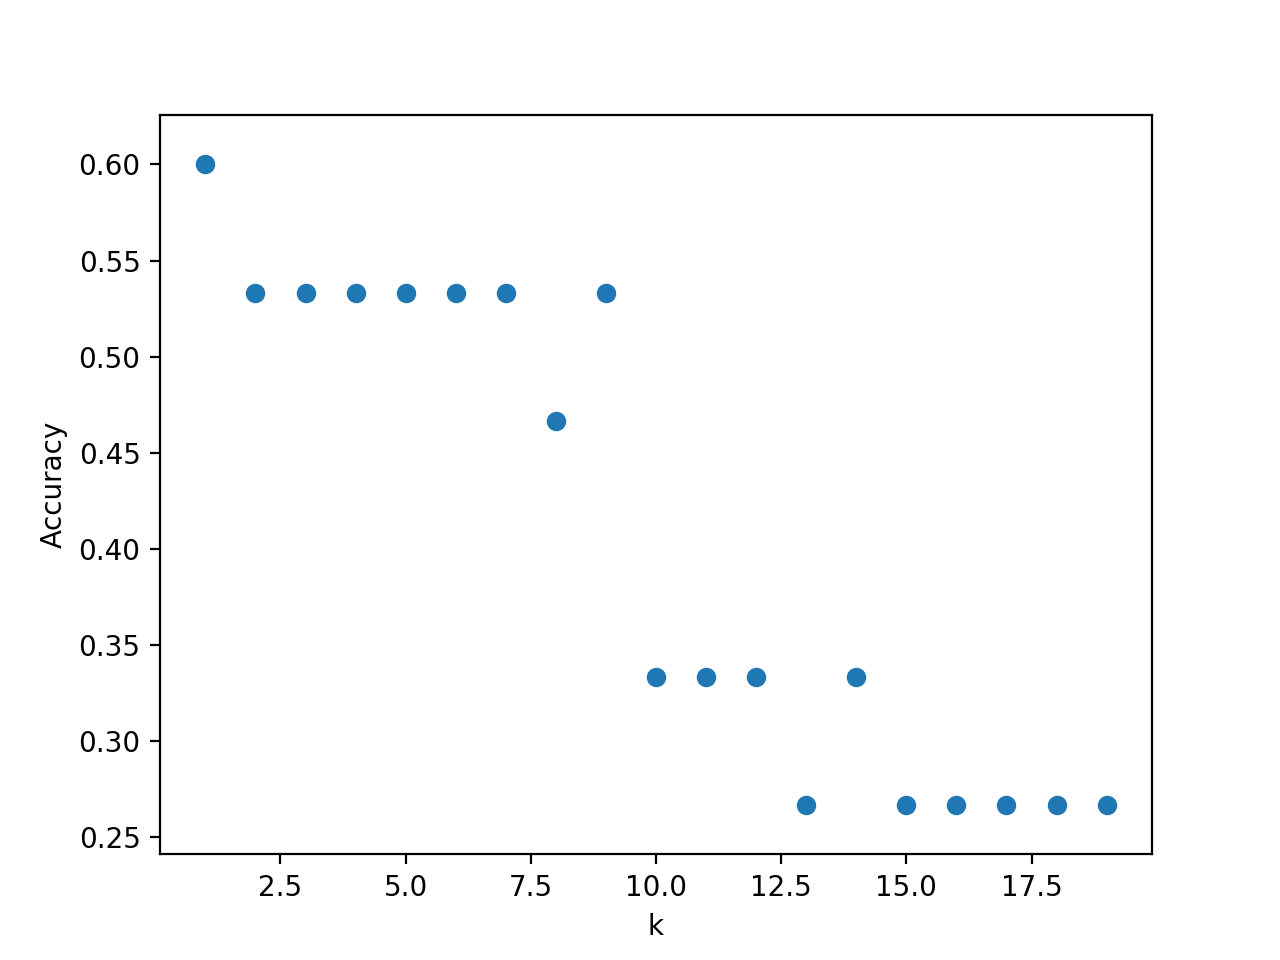

In [14]:
scores = []
k_range = range(1, 20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)